## Tea Data Exploration

Tea Sales happen through weekly auctions - 
    Data per record is:
    - supply qty
    - sold qty
    - average price 
    for 4 types of tea:
    - Ortho leaf
    - Ortho dust
    - CTC leaf
    - CTC dust
    for 2012-2020 for
    . CHN: Cochin
    . (CBE: Coimbatore)
    . (CNR: Conoor)

This is the auction data for J Thomas and Co - a tea broker for which Aadi works

Just wanted to pick your brains on some interesting charts or dashboards that we could come up with on the variations of price/qty on offer/qty sold/av price across the three markets and the fluctuations across the year?

In [1]:
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.style.use('ggplot') #uncomment this to change the plotting style
#plt.style.use('fivethirtyeight')

In [2]:
def clean_data(filename):
    df_from_file = pd.read_csv(filename, index_col=None, header=0)
    if '2012' in filename:
        cols = ['week_ending', 
                'date_of_sale', 
                'serial_no', 
                'ctc_leaf_offer_qty', 
                'ctc_dust_offer_qty', 
                'ortho_leaf_offer_qty', 
                'ortho_dust_offer_qty',
                'kangra_leaf_offer_qty',
                #'kangra_dust_offer_qty',
                'darj_leaf_offer_qty',
                #'darj_dust_offer_qty',
                'green_leaf_offer_qty',
                #'green_dust_offer_qty',
                'total_offer_qty',
                'ctc_leaf_sold_qty', 
                'ctc_leaf_avg_price', 
                'ctc_dust_sold_qty', 
                'ctc_dust_avg_price', 
                'ortho_leaf_sold_qty', 
                'ortho_leaf_avg_price', 
                'ortho_dust_sold_qty',
                'ortho_dust_avg_price',
                'kangra_leaf_sold_qty',
                'kangra_leaf_avg_price',
                #'kangra_dust_sold_qty',
                #'kangra_dust_avg_price',
                'darj_leaf_sold_qty',
                'darj_leaf_avg_price',
                #'darj_dust_sold_qty',
                #'darj_dust_avg_price',
                'green_leaf_sold_qty',
                'green_leaf_avg_price',
                #'green_dust_sold_qty',
                #'green_dust_avg_price',
                'total_sold_qty',
                'total_sold_avg_price',
                'auction_center'
               ]
    elif '2013' in filename or '2014' in filename:
        cols = ['week_ending', 
                'date_of_sale', 
                'serial_no', 
                'ctc_leaf_offer_qty', 
                'ctc_dust_offer_qty', 
                'ortho_leaf_offer_qty', 
                'ortho_dust_offer_qty',
                'kangra_leaf_offer_qty',
                #'kangra_dust_offer_qty',
                'darj_leaf_offer_qty',
                'darj_dust_offer_qty',
                'green_leaf_offer_qty',
                #'green_dust_offer_qty',
                'total_offer_qty',
                'ctc_leaf_sold_qty', 
                'ctc_leaf_avg_price', 
                'ctc_dust_sold_qty', 
                'ctc_dust_avg_price', 
                'ortho_leaf_sold_qty', 
                'ortho_leaf_avg_price', 
                'ortho_dust_sold_qty',
                'ortho_dust_avg_price',
                'kangra_leaf_sold_qty',
                'kangra_leaf_avg_price',
                #'kangra_dust_sold_qty',
                #'kangra_dust_avg_price',
                'darj_leaf_sold_qty',
                'darj_leaf_avg_price',
                'darj_dust_sold_qty',
                'darj_dust_avg_price',
                'green_leaf_sold_qty',
                'green_leaf_avg_price',
                #'green_dust_sold_qty',
                #'green_dust_avg_price',
                'total_sold_qty',
                'total_sold_avg_price',
                'auction_center'
               ]
       
    elif '2015' in filename or '2016' in filename:
        cols = ['week_ending', 
                'date_of_sale', 
                'serial_no', 
                'ctc_leaf_offer_qty', 
                'ctc_dust_offer_qty', 
                'ortho_leaf_offer_qty', 
                'ortho_dust_offer_qty',
                'kangra_leaf_offer_qty',
                #'kangra_dust_offer_qty',
                'darj_leaf_offer_qty',
                'darj_dust_offer_qty',
                'green_leaf_offer_qty',
                'green_dust_offer_qty',
                'total_offer_qty',
                'ctc_leaf_sold_qty', 
                'ctc_leaf_avg_price', 
                'ctc_dust_sold_qty', 
                'ctc_dust_avg_price', 
                'ortho_leaf_sold_qty', 
                'ortho_leaf_avg_price', 
                'ortho_dust_sold_qty',
                'ortho_dust_avg_price',
                'kangra_leaf_sold_qty',
                'kangra_leaf_avg_price',
                #'kangra_dust_sold_qty',
                #'kangra_dust_avg_price',
                'darj_leaf_sold_qty',
                'darj_leaf_avg_price',
                'darj_dust_sold_qty',
                'darj_dust_avg_price',
                'green_leaf_sold_qty',
                'green_leaf_avg_price',
                'green_dust_sold_qty',
                'green_dust_avg_price',
                'total_sold_qty',
                'total_sold_avg_price',
                'auction_center'
               ]
    else:
        cols = ['week_ending', 
                'date_of_sale', 
                'serial_no', 
                'ctc_leaf_offer_qty', 
                'ctc_dust_offer_qty', 
                'ortho_leaf_offer_qty', 
                'ortho_dust_offer_qty',
                'kangra_leaf_offer_qty',
                'kangra_dust_offer_qty',
                'darj_leaf_offer_qty',
                'darj_dust_offer_qty',
                'green_leaf_offer_qty',
                'green_dust_offer_qty',
                'total_offer_qty',
                'ctc_leaf_sold_qty', 
                'ctc_leaf_avg_price', 
                'ctc_dust_sold_qty', 
                'ctc_dust_avg_price', 
                'ortho_leaf_sold_qty', 
                'ortho_leaf_avg_price', 
                'ortho_dust_sold_qty',
                'ortho_dust_avg_price',
                'kangra_leaf_sold_qty',
                'kangra_leaf_avg_price',
                'kangra_dust_sold_qty',
                'kangra_dust_avg_price',
                'darj_leaf_sold_qty',
                'darj_leaf_avg_price',
                'darj_dust_sold_qty',
                'darj_dust_avg_price',
                'green_leaf_sold_qty',
                'green_leaf_avg_price',
                'green_dust_sold_qty',
                'green_dust_avg_price',
                'total_sold_qty',
                'total_sold_avg_price',
                'auction_center',
                'year'
               ]

    df_from_file = df_from_file.iloc[4:, :len(cols)]
    df_from_file.columns = cols
    
    df_from_file['auction_center'] = filename[-7:-7+3]
    df_from_file['year'] = filename[-12:-12+4]
    
#     nmcols = ['ctc_leaf_offer_qty', 
#               'ctc_dust_offer_qty', 
#               'ortho_leaf_offer_qty', 
#               'ortho_dust_offer_qty',
#               'kangra_leaf_offer_qty',
#               'kangra_dust_offer_qty',
#               'darj_leaf_offer_qty',
#               'darj_dust_offer_qty',
#               'green_leaf_offer_qty',
#               'green_dust_offer_qty',
#               'total_offer_qty',
#               'ctc_leaf_sold_qty', 
#               'ctc_leaf_avg_price', 
#               'ctc_dust_sold_qty', 
#               'ctc_dust_avg_price', 
#               'ortho_leaf_sold_qty', 
#               'ortho_leaf_avg_price', 
#               'ortho_dust_sold_qty',
#               'ortho_dust_avg_price',
#               'kangra_leaf_sold_qty',
#               'kangra_leaf_avg_price',
#               'kangra_dust_sold_qty',
#               'kangra_dust_avg_price',
#               'darj_leaf_sold_qty',
#               'darj_leaf_avg_price',
#               'darj_dust_sold_qty',
#               'darj_dust_avg_price',
#               'green_leaf_sold_qty',
#               'green_leaf_avg_price',
#               'green_dust_sold_qty',
#               'green_dust_avg_price',
#               'total_sold_qty',
#               'total_sold_avg_price'
#              ]
    
#     df_from_file[nmcols] = df_from_file[nmcols].apply(pd.to_numeric)
#     df_from_file[nmcols] = df_from_file[nmcols].replace(0.00, np.nan)
    
    return df_from_file

In [3]:
allcols = ['week_ending', 
           'date_of_sale', 
           'serial_no', 
           'ctc_leaf_offer_qty', 
           'ctc_dust_offer_qty', 
           'ortho_leaf_offer_qty', 
           'ortho_dust_offer_qty',
           'kangra_leaf_offer_qty',
           'kangra_dust_offer_qty',
           'darj_leaf_offer_qty',
           'darj_dust_offer_qty',
           'green_leaf_offer_qty',
           'green_dust_offer_qty',
           'total_offer_qty',
           'ctc_leaf_sold_qty', 
           'ctc_leaf_avg_price', 
           'ctc_dust_sold_qty', 
           'ctc_dust_avg_price', 
           'ortho_leaf_sold_qty', 
           'ortho_leaf_avg_price', 
           'ortho_dust_sold_qty',
           'ortho_dust_avg_price',
           'kangra_leaf_sold_qty',
           'kangra_leaf_avg_price',
           'kangra_dust_sold_qty',
           'kangra_dust_avg_price',
           'darj_leaf_sold_qty',
           'darj_leaf_avg_price',
           'darj_dust_sold_qty',
           'darj_dust_avg_price',
           'green_leaf_sold_qty',
           'green_leaf_avg_price',
           'green_dust_sold_qty',
           'green_dust_avg_price',
           'total_sold_qty',
           'total_sold_avg_price',
           'auction_center',
           'year'
          ]
df_all_CHN = pd.DataFrame(columns=allcols)

In [4]:
df_all_CHN

,week_ending,date_of_sale,serial_no,ctc_leaf_offer_qty,ctc_dust_offer_qty,ortho_leaf_offer_qty,ortho_dust_offer_qty,kangra_leaf_offer_qty,kangra_dust_offer_qty,darj_leaf_offer_qty,...,darj_dust_sold_qty,darj_dust_avg_price,green_leaf_sold_qty,green_leaf_avg_price,green_dust_sold_qty,green_dust_avg_price,total_sold_qty,total_sold_avg_price,auction_center,year


In [5]:
path = r'../Data/' # use your path
all_files_CHN = glob.glob(path + "/*_CHN.csv")

In [6]:
all_files_CHN = sorted(all_files_CHN)
all_files_CHN

['../Data/2012_CHN.csv',
 '../Data/2013_CHN.csv',
 '../Data/2014_CHN.csv',
 '../Data/2015_CHN.csv',
 '../Data/2016_CHN.csv',
 '../Data/2017_CHN.csv',
 '../Data/2018_CHN.csv',
 '../Data/2019_CHN.csv',
 '../Data/2020_CHN.csv']

In [7]:
for filename in sorted(all_files_CHN):
    df = clean_data(filename)
    df_all_CHN = pd.concat([df_all_CHN, df]).reset_index(drop = True)

In [8]:
df_all_CHN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   week_ending            448 non-null    object
 1   date_of_sale           448 non-null    object
 2   serial_no              448 non-null    object
 3   ctc_leaf_offer_qty     448 non-null    object
 4   ctc_dust_offer_qty     448 non-null    object
 5   ortho_leaf_offer_qty   448 non-null    object
 6   ortho_dust_offer_qty   448 non-null    object
 7   kangra_leaf_offer_qty  447 non-null    object
 8   kangra_dust_offer_qty  192 non-null    object
 9   darj_leaf_offer_qty    447 non-null    object
 10  darj_dust_offer_qty    396 non-null    object
 11  green_leaf_offer_qty   447 non-null    object
 12  green_dust_offer_qty   295 non-null    object
 13  total_offer_qty        448 non-null    object
 14  ctc_leaf_sold_qty      448 non-null    object
 15  ctc_leaf_avg_price     

In [9]:
nmcols = ['ctc_leaf_offer_qty', 
          'ctc_dust_offer_qty', 
          'ortho_leaf_offer_qty', 
          'ortho_dust_offer_qty',
          'kangra_leaf_offer_qty',
          'kangra_dust_offer_qty',
          'darj_leaf_offer_qty',
          'darj_dust_offer_qty',
          'green_leaf_offer_qty',
          'green_dust_offer_qty',
          'total_offer_qty',
          'ctc_leaf_sold_qty', 
          'ctc_leaf_avg_price', 
          'ctc_dust_sold_qty', 
          'ctc_dust_avg_price', 
          'ortho_leaf_sold_qty', 
          'ortho_leaf_avg_price', 
          'ortho_dust_sold_qty',
          'ortho_dust_avg_price',
          'kangra_leaf_sold_qty',
          'kangra_leaf_avg_price',
          'kangra_dust_sold_qty',
          'kangra_dust_avg_price',
          'darj_leaf_sold_qty',
          'darj_leaf_avg_price',
          'darj_dust_sold_qty',
          'darj_dust_avg_price',
          'green_leaf_sold_qty',
          'green_leaf_avg_price',
          'green_dust_sold_qty',
          'green_dust_avg_price',
          'total_sold_qty',
          'total_sold_avg_price'
         ]
    
df_all_CHN[nmcols] = df_all_CHN[nmcols].apply(pd.to_numeric)
df_all_CHN[nmcols] = df_all_CHN[nmcols].replace(0.00, np.nan)

In [10]:
df_all_CHN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   week_ending            448 non-null    object 
 1   date_of_sale           448 non-null    object 
 2   serial_no              448 non-null    object 
 3   ctc_leaf_offer_qty     448 non-null    float64
 4   ctc_dust_offer_qty     448 non-null    float64
 5   ortho_leaf_offer_qty   448 non-null    float64
 6   ortho_dust_offer_qty   448 non-null    float64
 7   kangra_leaf_offer_qty  4 non-null      float64
 8   kangra_dust_offer_qty  4 non-null      float64
 9   darj_leaf_offer_qty    0 non-null      float64
 10  darj_dust_offer_qty    0 non-null      float64
 11  green_leaf_offer_qty   0 non-null      float64
 12  green_dust_offer_qty   0 non-null      float64
 13  total_offer_qty        448 non-null    float64
 14  ctc_leaf_sold_qty      448 non-null    float64
 15  ctc_le

In [11]:
# set up CTC leaf
df_CHN_CTC_leaf = df_all_CHN[['week_ending', 'year', 'serial_no', 'ctc_leaf_offer_qty', 'ctc_leaf_sold_qty', 'ctc_leaf_avg_price']].copy()
df_CHN_CTC_leaf = df_CHN_CTC_leaf[df_CHN_CTC_leaf['ctc_leaf_avg_price'].notnull()]
df_CHN_CTC_leaf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 0 to 464
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   week_ending         448 non-null    object 
 1   year                448 non-null    object 
 2   serial_no           448 non-null    object 
 3   ctc_leaf_offer_qty  448 non-null    float64
 4   ctc_leaf_sold_qty   448 non-null    float64
 5   ctc_leaf_avg_price  448 non-null    float64
dtypes: float64(3), object(3)
memory usage: 24.5+ KB


In [12]:
# set up CTC dust
df_CHN_CTC_dust = df_all_CHN[['week_ending', 'year', 'serial_no', 'ctc_dust_offer_qty', 'ctc_dust_sold_qty', 'ctc_dust_avg_price']].copy()
df_CHN_CTC_dust = df_CHN_CTC_dust[df_CHN_CTC_dust['ctc_dust_avg_price'].notnull()]
df_CHN_CTC_dust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 0 to 464
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   week_ending         448 non-null    object 
 1   year                448 non-null    object 
 2   serial_no           448 non-null    object 
 3   ctc_dust_offer_qty  448 non-null    float64
 4   ctc_dust_sold_qty   448 non-null    float64
 5   ctc_dust_avg_price  448 non-null    float64
dtypes: float64(3), object(3)
memory usage: 24.5+ KB


In [13]:
std = df_CHN_CTC_dust['ctc_dust_sold_qty'].std()
mu = df_CHN_CTC_dust['ctc_dust_sold_qty'].mean()
df_CHN_CTC_dust[df_CHN_CTC_dust['ctc_dust_sold_qty'] < (mu - 2*std)]

,week_ending,year,serial_no,ctc_dust_offer_qty,ctc_dust_sold_qty,ctc_dust_avg_price
230,25-Jun-16,2016,25,1047001.4,430323.0,115.25
231,2-Jul-16,2016,26,1151429.0,332056.2,114.83
232,9-Jul-16,2016,27,1079178.7,285711.5,111.72
233,16-Jul-16,2016,28,1052140.5,425751.2,113.33
234,23-Jul-16,2016,29,808170.6,359579.4,114.68
280,11-Mar-17,2017,10,662448.0,510879.6,137.02
355,11-Aug-18,2018,32,603784.4,483306.4,125.18
359,8-Sep-18,2018,36,408094.0,317955.0,137.06
360,15-Sep-18,2018,37,648541.5,486119.0,134.63
362,29-Sep-18,2018,39,643695.6,472979.9,134.40


In [14]:
# set up Ortho leaf
df_CHN_Ortho_leaf = df_all_CHN[['week_ending', 'year', 'serial_no', 'ortho_leaf_offer_qty', 'ortho_leaf_sold_qty', 'ortho_leaf_avg_price']].copy()
df_CHN_Ortho_leaf = df_CHN_Ortho_leaf[df_CHN_Ortho_leaf['ortho_leaf_avg_price'].notnull()]
df_CHN_Ortho_leaf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 0 to 464
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   week_ending           448 non-null    object 
 1   year                  448 non-null    object 
 2   serial_no             448 non-null    object 
 3   ortho_leaf_offer_qty  448 non-null    float64
 4   ortho_leaf_sold_qty   448 non-null    float64
 5   ortho_leaf_avg_price  448 non-null    float64
dtypes: float64(3), object(3)
memory usage: 24.5+ KB


In [15]:
# set up Ortho dust
df_CHN_Ortho_dust = df_all_CHN[['week_ending', 'year', 'serial_no', 'ortho_dust_offer_qty', 'ortho_dust_sold_qty', 'ortho_dust_avg_price']].copy()
df_CHN_Ortho_dust = df_CHN_Ortho_dust[df_CHN_Ortho_dust['ortho_dust_avg_price'].notnull()]
df_CHN_Ortho_dust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 0 to 464
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   week_ending           448 non-null    object 
 1   year                  448 non-null    object 
 2   serial_no             448 non-null    object 
 3   ortho_dust_offer_qty  448 non-null    float64
 4   ortho_dust_sold_qty   448 non-null    float64
 5   ortho_dust_avg_price  448 non-null    float64
dtypes: float64(3), object(3)
memory usage: 24.5+ KB


In [16]:
def plot_avg_sales_price(df, city, category):

    y1 = df[category + '_avg_price']

    x = pd.to_datetime(df['week_ending'])

    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(x, y1, '*-', label = category.upper() + ' Avg Price')

    ax.legend(loc='best')
    ax.tick_params(rotation=45, axis='x')
    ax.set_xlabel('Week Ending')
    ax.set_ylabel('Average Price in Rs. per Kg')
    ax.set_title('Average Sale Prices for ' + category.upper() + ' (' + city + ')')
    plt.savefig('../Images/' + 'Average Sale Prices for ' + category.upper() + ' (' + city + ')')


In [17]:
def plot_qty_offered_and_sold(df, city, category):

    y1 = df[category + '_offer_qty']
    y2 = df[category + '_sold_qty']

    x = pd.to_datetime(df['week_ending'])

    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(x, y1, '*-', label = category.upper() + ' Offer Qty')
    ax.plot(x, y2, '*-', label = category.upper() + ' Sold Qty')

    ax.legend(loc='best')
    ax.tick_params(rotation=45, axis='x')
    ax.set_xlabel('Year (52 weeks)')
    ax.set_ylabel('Kg')
    ax.set_title('Qty Offered and Sold for ' + category.upper() + ' (' + city + ')')
    plt.savefig('../Images/' + 'Qty Offered and Sold for ' + category.upper() + ' (' + city + ')')


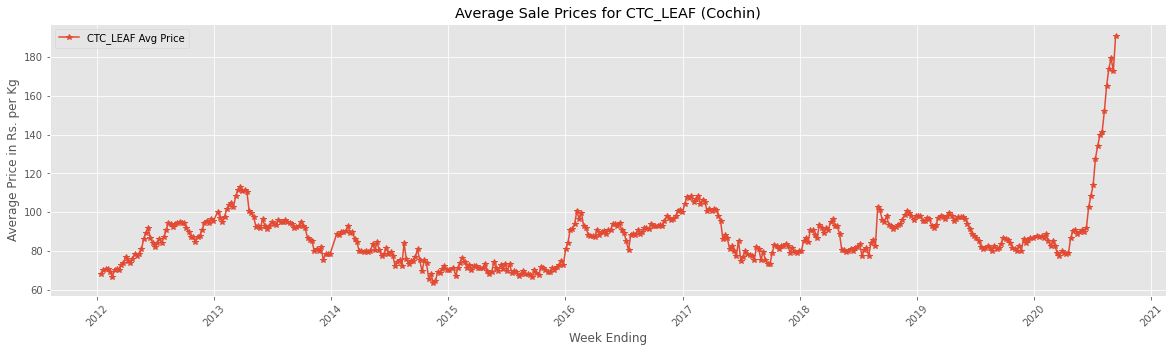

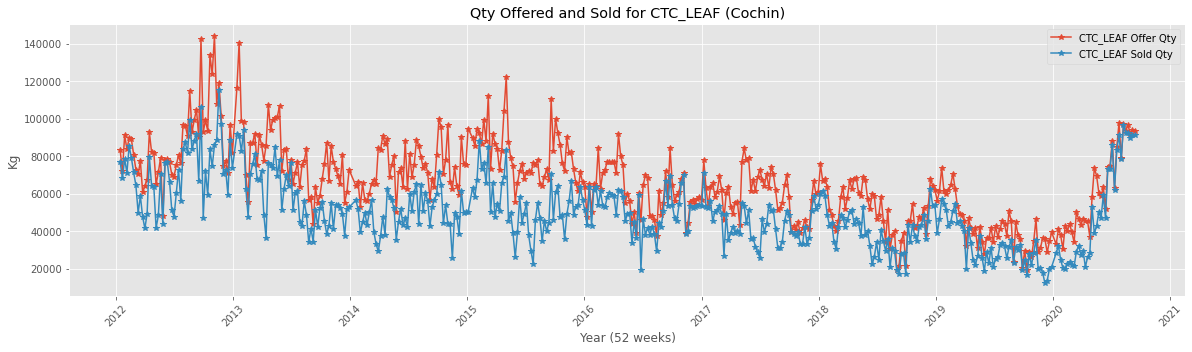

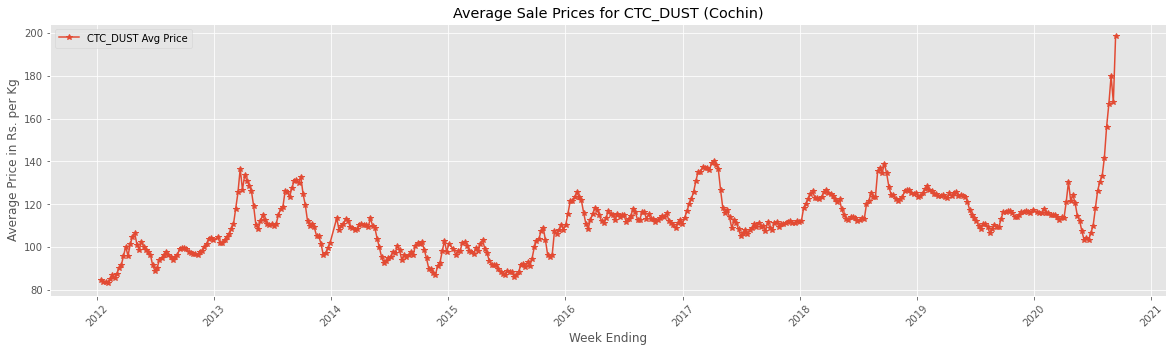

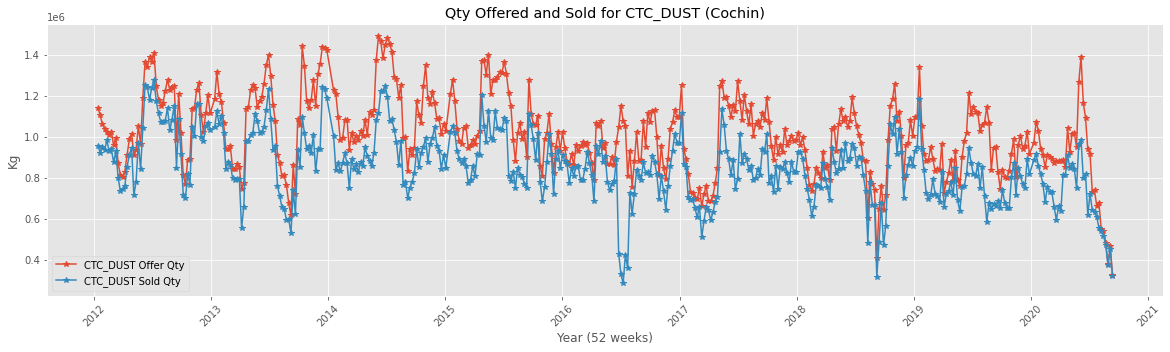

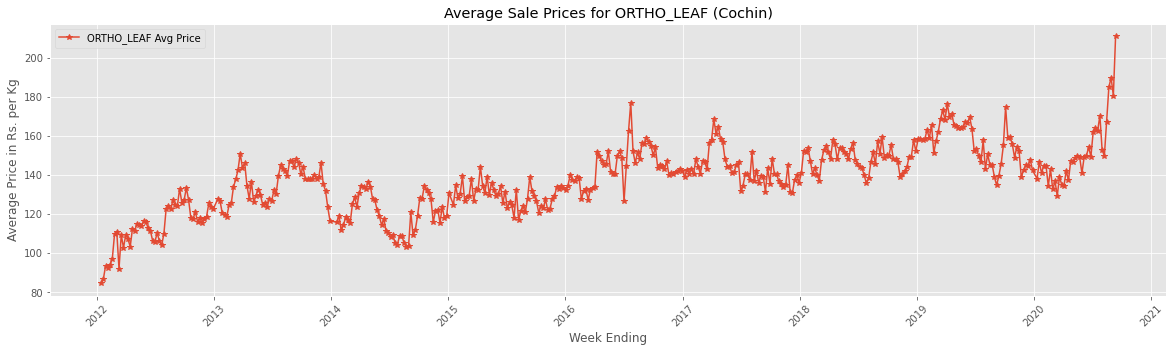

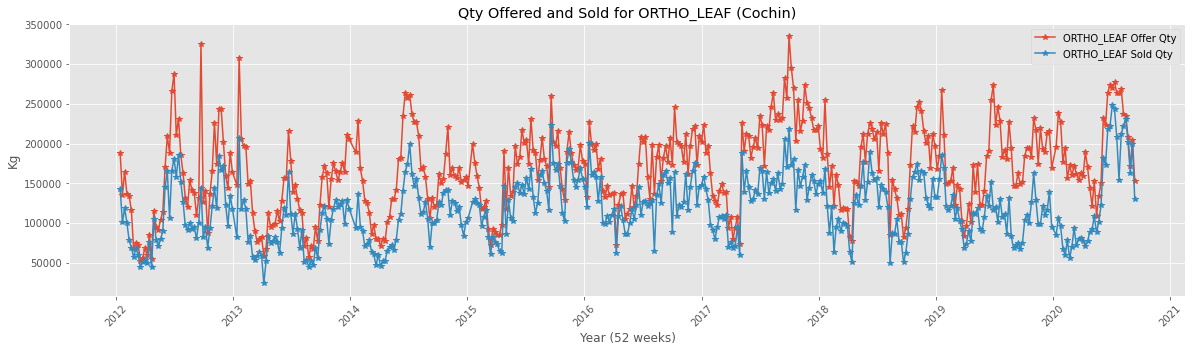

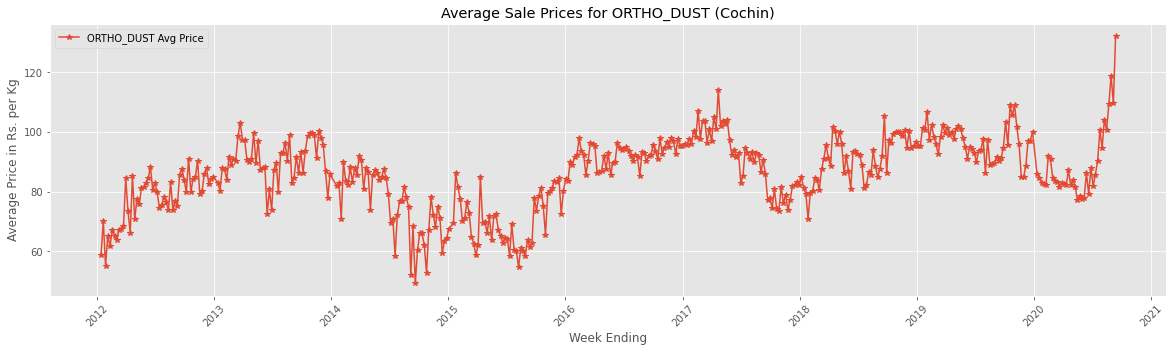

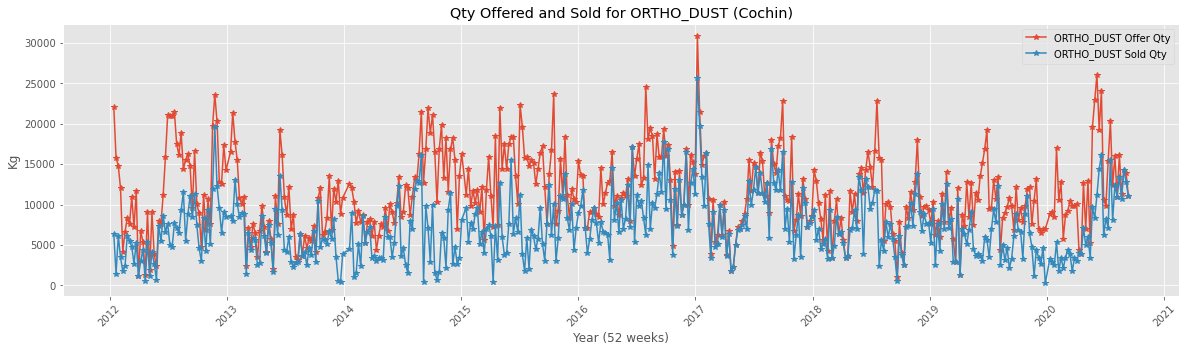

In [18]:
plot_avg_sales_price(df_CHN_CTC_leaf, 'Cochin', 'ctc_leaf')
plot_qty_offered_and_sold(df_CHN_CTC_leaf, 'Cochin', 'ctc_leaf')
plot_avg_sales_price(df_CHN_CTC_dust, 'Cochin', 'ctc_dust')
plot_qty_offered_and_sold(df_CHN_CTC_dust, 'Cochin', 'ctc_dust')
plot_avg_sales_price(df_CHN_Ortho_leaf, 'Cochin', 'ortho_leaf')
plot_qty_offered_and_sold(df_CHN_Ortho_leaf, 'Cochin', 'ortho_leaf')
plot_avg_sales_price(df_CHN_Ortho_dust, 'Cochin', 'ortho_dust')
plot_qty_offered_and_sold(df_CHN_Ortho_dust, 'Cochin', 'ortho_dust')

### Store cleaned data for fresh restarts

In [19]:
# Write to CSVs for quick restart
df_CHN_CTC_leaf.to_csv('../Data/df_CHN_CTC_leaf.csv', index=False)
df_CHN_CTC_dust.to_csv('../Data/df_CHN_CTC_dust.csv', index=False)
df_CHN_Ortho_leaf.to_csv('../Data/df_CHN_Ortho_leaf.csv', index=False)
df_CHN_Ortho_dust.to_csv('../Data/df_CHN_Ortho_dust.csv', index=False)

### Read back from storage

In [20]:
# Read from CSVs for quick restart
df_CHN_CTC_leaf = pd.read_csv('../Data/df_CHN_CTC_leaf.csv')
df_CHN_CTC_dust = pd.read_csv('../Data/df_CHN_CTC_dust.csv')
df_CHN_Ortho_leaf = pd.read_csv('../Data/df_CHN_Ortho_leaf.csv')
df_CHN_Ortho_dust = pd.read_csv('../Data/df_CHN_Ortho_dust.csv')

In [28]:
df_CHN_Ortho_leaf.head()
# df_CHN_CTC_dust = pd.read_csv('../Data/df_CHN_CTC_dust.csv')
# df_CHN_Ortho_leaf = pd.read_csv('../Data/df_CHN_Ortho_leaf.csv')
# df_CHN_Ortho_dust = pd.read_csv('../Data/df_CHN_Ortho_dust.csv')

,week_ending,year,serial_no,ortho_leaf_offer_qty,ortho_leaf_sold_qty,ortho_leaf_avg_price
0,14-Jan-12,2012,2,188372.0,142808.0,84.54
1,21-Jan-12,2012,3,135846.0,101313.0,86.53
2,28-Jan-12,2012,4,164846.0,118431.0,93.37
3,4-Feb-12,2012,5,136420.0,100359.0,92.29
4,11-Feb-12,2012,6,133988.0,78319.0,93.97


In [22]:
# from matplotlib.ticker import FixedLocator, FixedFormatter

# def plot_avg_sales_price_all_cities():

# #     y_formatter = FixedFormatter(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
# #     y_locator = FixedLocator([range(1, 12)])
  
#     fig, axs = plt.subplots(2, 2, figsize=(20, 20))
# # df['DataFrame Column'] = pd.to_datetime(df['DataFrame Column'], format=specify your format)
#     x = pd.to_datetime(df['Date of Sale']) # .dt.strftime('%b')
# #     df['Month-str'] = df['Date'].dt.strftime('%b')
#     # CTC Leaf
#     y1_CTC_leaf = df_CHN['Sold CTC Leaf Avg Price']
#     y2_CTC_leaf = df_CNR['Sold CTC Leaf Avg Price']
#     y3_CTC_leaf = df_CBE['Sold CTC Leaf Avg Price']
    
#     axs[0,0].plot(x, y1_CTC_leaf, '*-', c='r', label='CHN CTC Leaf Avg Price')
#     axs[0,0].plot(x, y2_CTC_leaf, '*-', c='b', label='CNR CTC Leaf Avg Price')
#     axs[0,0].plot(x, y3_CTC_leaf, '*-', c='g', label='CBE CTC Leaf Avg Price')

#     axs[0,0].legend(loc='best')
#     axs[0,0].tick_params(rotation=75, axis='x')

# #     axs[0,0].yaxis.set_major_formatter(y_formatter)
# #     axs[0,0].yaxis.set_major_locator(y_locator)
                          
#     axs[0,0].set_xlabel('Date of Sale')
#     axs[0,0].set_ylabel('Average Price in Rs. per Kg')
#     axs[0,0].set_title('CTC Leaf Average Prices across all cities')

#     # CTC Dust
#     y1_CTC_dust = df_CHN['Sold CTC Dust Avg Price']
#     y2_CTC_dust = df_CNR['Sold CTC Dust Avg Price']
#     y3_CTC_dust = df_CBE['Sold CTC Dust Avg Price']
    
#     axs[0,1].plot(x, y1_CTC_dust, '*-', c='r', label='CHN CTC Dust Avg Price')
#     axs[0,1].plot(x, y2_CTC_dust, '*-', c='b', label='CNR CTC Dust Avg Price')
#     axs[0,1].plot(x, y3_CTC_dust, '*-', c='g', label='CBE CTC Dust Avg Price')

#     axs[0,1].legend(loc='best')
#     axs[0,1].tick_params(rotation=90, axis='x', size=4)
#     axs[0,1].set_xlabel('Date of Sale')
#     axs[0,1].set_ylabel('Average Price in Rs. per Kg')
#     axs[0,1].set_title('CTC Dust Average Prices across all cities')

#     # Ortho Leaf
#     y1_Ortho_leaf = df_CHN['Sold Ortho Leaf Avg Price']
#     y2_Ortho_leaf = df_CNR['Sold Ortho Leaf Avg Price']
#     y3_Ortho_leaf = df_CBE['Sold Ortho Leaf Avg Price']
    
#     axs[1,0].plot(x, y1_Ortho_leaf, '*-', c='r', label='CHN Ortho Leaf Avg Price')
#     axs[1,0].plot(x, y2_Ortho_leaf, '*-', c='b', label='CNR Ortho Leaf Avg Price')
#     axs[1,0].plot(x, y3_Ortho_leaf, '*-', c='g', label='CBE Ortho Leaf Avg Price')

#     axs[1,0].legend(loc='best')
#     axs[1,0].tick_params(rotation=60, axis='x')
#     axs[1,0].set_xlabel('Date of Sale')
#     axs[1,0].set_ylabel('Average Price in Rs. per Kg')
#     axs[1,0].set_title('Ortho Leaf Average Prices across all cities')

#     # Ortho Dust
#     y1_Ortho_dust = df_CHN['Sold Ortho Dust Avg Price']
#     y2_Ortho_dust = df_CNR['Sold Ortho Dust Avg Price']
#     y3_Ortho_dust = df_CBE['Sold Ortho Dust Avg Price']
    
#     axs[1,1].plot(x, y1_Ortho_dust, '*-', c='r', label='CHN Ortho Dust Avg Price')
#     axs[1,1].plot(x, y2_Ortho_dust, '*-', c='b', label='CNR Ortho Dust Avg Price')
#     axs[1,1].plot(x, y3_Ortho_dust, '*-', c='g', label='CBE Ortho Dust Avg Price')

#     axs[1,1].legend(loc='best')
#     axs[1,1].tick_params(rotation=80, axis='x')
#     axs[1,1].set_xlabel('Date of Sale')
#     axs[1,1].set_ylabel('Average Price in Rs. per Kg')
#     axs[1,1].set_title('Otho Dust Average Prices across all cities')
#     plt.savefig('../Images/Ortho Dust Average Prices across all cities')

In [23]:
# plot_avg_sales_price_all_cities()

In [24]:
# df_CHN.columns

In [25]:
# def plot_offer_total_qty_sold_total_qty_avg_price_all_cities():

    
#     fig, axs = plt.subplots(3, 2, figsize=(20, 20))
#     plt.tight_layout() 

#     # CHN
    
#     x = pd.to_datetime(df_CHN['Date of Sale'])

#     y1_offer_total_qty = df_CHN['Offer Total Qty']
#     y2_sold_total_qty = df_CHN['Sold Total Qty']

#     axs[0,0].plot(x, y1_offer_total_qty, '*-', c='r', label='Total Offer Qty')
#     axs[0,0].plot(x, y2_sold_total_qty, 'x--', c='r', label='Total Sold Qty')
    
#     axs[0,0].legend(loc='best')
#     axs[0,0].tick_params(rotation=45, axis='x')
#     axs[0,0].set_xlabel('Date of Sale')
#     axs[0,0].set_ylabel('Quantities (Kg)')
#     axs[0,0].set_title('Total Offer Quantities and Sold Quantities for Cochin')

#     y3_sold_avg_price = df_CHN['Sold Avg Price']   
#     axs[0,1].plot(x, y3_sold_avg_price, '*-', c='r', label='Average Price')

#     axs[0,1].legend(loc='best')
#     axs[0,1].tick_params(rotation=45, axis='x')
#     axs[0,1].set_xlabel('Date of Sale')
#     axs[0,1].set_ylabel('Overall Average Price in Rs. per Kg')
#     axs[0,1].set_title('Overall Average Price for Cochin')

#     # CBE

#     x = pd.to_datetime(df_CBE['Date of Sale'])

#     y1_offer_total_qty = df_CBE['Offer Total Qty']
#     y2_sold_total_qty = df_CBE['Sold Total Qty']

#     axs[1,0].plot(x, y1_offer_total_qty, '*-', c='b', label='Total Offer Qty')
#     axs[1,0].plot(x, y2_sold_total_qty, 'x--', c='b', label='Total Sold Qty')
    
#     axs[1,0].legend(loc='best')
#     axs[1,0].tick_params(rotation=45, axis='x')
#     axs[1,0].set_xlabel('Date of Sale')
#     axs[1,0].set_ylabel('Quantities (Kg)')
#     axs[1,0].set_title('Total Offer Quantities and Sold Quantities for Coimbatore')

#     y3_sold_avg_price = df_CBE['Sold Avg Price']   
#     axs[1,1].plot(x, y3_sold_avg_price, '*-', c='b', label='Average Price')

#     axs[1,1].legend(loc='best')
#     axs[1,1].tick_params(rotation=45, axis='x')
#     axs[1,1].set_xlabel('Date of Sale')
#     axs[1,1].set_ylabel('Overall Average Price in Rs. per Kg')
#     axs[1,1].set_title('Overall Average Price for Coimbatore')

#     # CNR

#     x = pd.to_datetime(df_CNR['Date of Sale'])

#     y1_offer_total_qty = df_CNR['Offer Total Qty']
#     y2_sold_total_qty = df_CNR['Sold Total Qty']

#     axs[2,0].plot(x, y1_offer_total_qty, '*-', c='g', label='Total Offer Qty')
#     axs[2,0].plot(x, y2_sold_total_qty, 'x--', c='g', label='Total Sold Qty')
    
#     axs[2,0].legend(loc='best')
#     axs[2,0].tick_params(rotation=45, axis='x')
#     axs[2,0].set_xlabel('Date of Sale')
#     axs[2,0].set_ylabel('Quantities (Kg)')
#     axs[2,0].set_title('Total Offer Quantities and Sold Quantities for Conoor')

#     y3_sold_avg_price = df_CNR['Sold Avg Price']   
#     axs[2,1].plot(x, y3_sold_avg_price, '*-', c='g', label='Average Price')

#     axs[2,1].legend(loc='best')
#     axs[2,1].tick_params(rotation=45, axis='x')
#     axs[2,1].set_xlabel('Date of Sale')
#     axs[2,1].set_ylabel('Overall Average Price in Rs. per Kg')
#     axs[2,1].set_title('Overall Average Price for Conoor')

#     plt.savefig('../Images/Total Qty Offered and Sold with Overall Avg Price for Cochin')

In [26]:
# plot_offer_total_qty_sold_total_qty_avg_price_all_cities()